In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\RAJ\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
skin_df = pd.read_csv('R:\CV\Skin Disease\SkinDiseaseDetectionSystem-master\Dataset/HAM10000_metadata.csv')

SIZE=32

le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

In [4]:
from sklearn.utils import resample
print(skin_df['label'].value_counts())


df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

print(skin_df_balanced['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64
5    500
3    500
1    500
6    500
4    500
2    500
0    500
Name: label, dtype: int64


In [5]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                    for x in glob(os.path.join('R:\CV\Skin Disease\SkinDiseaseDetectionSystem-master\Dataset/', '*', '*.jpg'))}

skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))



X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.
Y=skin_df_balanced['label']  
Y_cat = to_categorical(Y, num_classes=7)

x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [6]:
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          7

In [36]:
batch_size = 16 
epochs = 50

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
165/165 - 9s - loss: 0.6721 - acc: 0.7512 - val_loss: 0.8931 - val_acc: 0.6903
Epoch 2/50
165/165 - 8s - loss: 0.6985 - acc: 0.7387 - val_loss: 0.8174 - val_acc: 0.7223
Epoch 3/50
165/165 - 8s - loss: 0.7059 - acc: 0.7246 - val_loss: 0.8025 - val_acc: 0.7394
Epoch 4/50
165/165 - 8s - loss: 0.7220 - acc: 0.7318 - val_loss: 0.8215 - val_acc: 0.7154
Epoch 5/50
165/165 - 8s - loss: 0.6975 - acc: 0.7436 - val_loss: 0.8286 - val_acc: 0.7383
Epoch 6/50
165/165 - 8s - loss: 0.6398 - acc: 0.7623 - val_loss: 0.8388 - val_acc: 0.7154
Epoch 7/50
165/165 - 8s - loss: 0.6574 - acc: 0.7520 - val_loss: 0.8169 - val_acc: 0.7234
Epoch 8/50
165/165 - 8s - loss: 0.6719 - acc: 0.7573 - val_loss: 0.8100 - val_acc: 0.7257
Epoch 9/50
165/165 - 8s - loss: 0.6310 - acc: 0.7543 - val_loss: 0.8235 - val_acc: 0.7371
Epoch 10/50
165/165 - 8s - loss: 0.7213 - acc: 0.7288 - val_loss: 0.8068 - val_acc: 0.7314
Epoch 11/50
165/165 - 8s - loss: 0.6491 - acc: 0.7512 - val_loss: 0.8292 - val_acc: 0.7269
Epoch 12

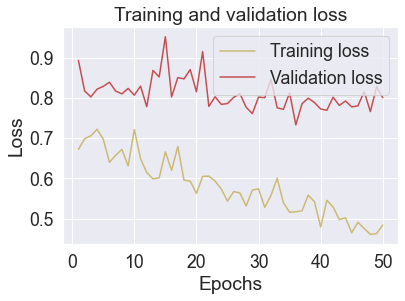

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

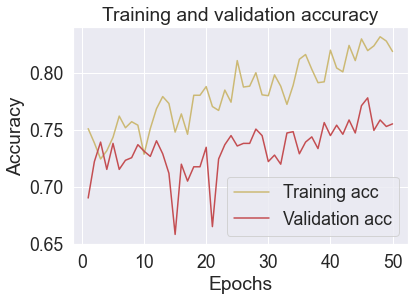

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

In [39]:
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis = 1) 

y_true = np.argmax(y_test, axis = 1)

In [58]:
dis = ["Actinic Keratoses:\n\nA rough, scaly patch on the skin caused by years of sun exposure. It usually affects older adults. Reducing sun exposure can help reduce risk.",
       "Basal Cell Carcinoma:\n\nIt is a type of skin cancer that most often develops on areas of skin exposed to the sun, such as the face. On brown and Black skin, basal cell carcinoma often looks like a bump that's brown or glossy black and has a rolled border",
       "Benign Keratosis:\n\nA non-cancerous skin condition that appears as a waxy brown, black or tan growth. It is one of the most common non-cancerous skin growths in older adults. While it's possible for one to appear on its own, multiple growths are more common",
       "Dermatofibroma:\n\nIt is a common cutaneous nodule of unknown etiology that occurs more often in women. Dermatofibroma frequently develops on the extremities (mostly the lower legs) and is usually asymptomatic, although pruritus and tenderness can be present",
       "Melanocytic Nevi:\n\nThese are benign neoplasms or hamartomas composed of melanocytes, the pigment-producing cells that constitutively colonize the epidermis",
       "Melanoma:\n\nIt is a form of skin cancer that begins in the cells (melanocytes) that control the pigment in your skin.n",
       "Vascular Skin Lesions:\n\nThese are relatively common abnormalities of the skin and underlying tissues, more commonly known as birthmarks."]

In [64]:
print(dis[y_pred_classes[8]])

Benign Keratosis:

A non-cancerous skin condition that appears as a waxy brown, black or tan growth. It is one of the most common non-cancerous skin growths in older adults. While it's possible for one to appear on its own, multiple growths are more common


In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy Score = ", accuracy_score(y_true, y_pred_classes, normalize=True, sample_weight=None), "\n")

target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

print(classification_report(y_true, y_pred_classes, target_names=target_names))

Accuracy Score =  0.7554285714285714 

              precision    recall  f1-score   support

     Class 0       0.84      0.66      0.74       149
     Class 1       0.64      0.79      0.71       128
     Class 2       0.61      0.68      0.64       120
     Class 3       0.90      0.96      0.93       128
     Class 4       0.60      0.57      0.59       112
     Class 5       0.71      0.61      0.66       113
     Class 6       0.98      0.99      0.99       125

    accuracy                           0.76       875
   macro avg       0.76      0.75      0.75       875
weighted avg       0.76      0.76      0.75       875



<AxesSubplot:>

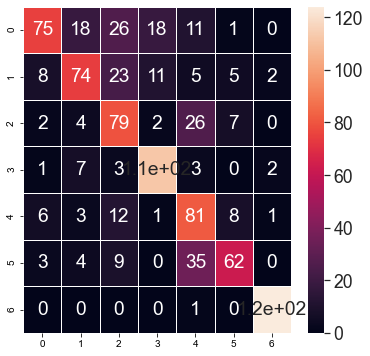

In [11]:
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

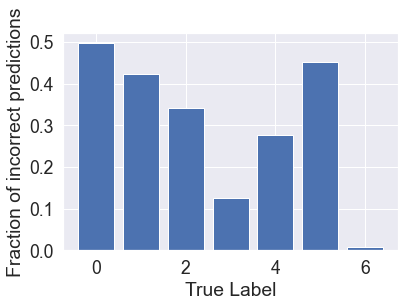

In [43]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [13]:
model.save('zep.model')

INFO:tensorflow:Assets written to: zep.model\assets
